In [2]:
import random
from past.builtins import xrange
import math
import numpy as np 


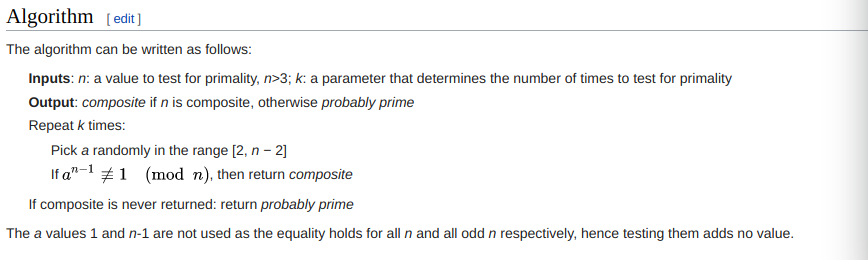

In [3]:
def fermat_test(p, k):
    if p < 3: return True
    if p % 2 == 0: return False
    
    for i in range(k):
        a = random.randint(2,p)
        if pow(a, p-1, p) != 1: return False
        
    return True

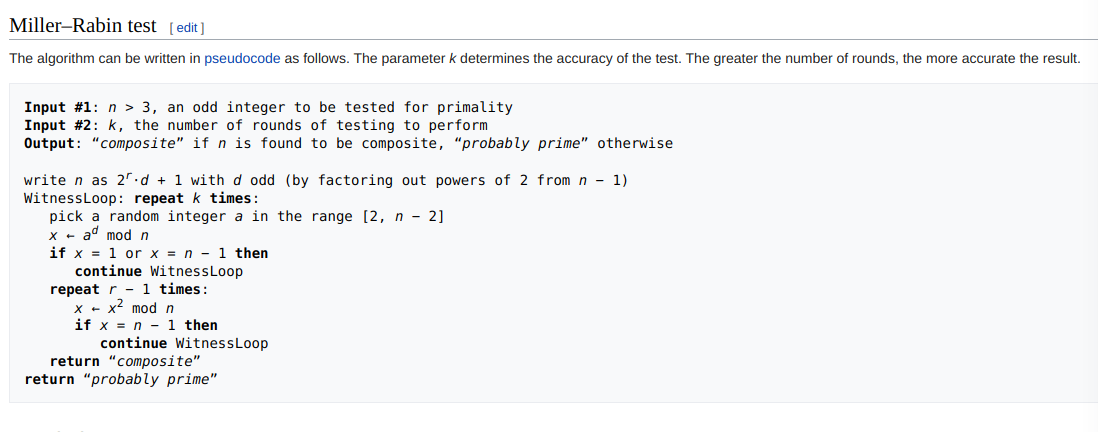

In [4]:
def miller_rabin_test(p, k):
    if p < 3: return True
    if p % 2 == 0: return False
    
    d = p - 1
    r = 1
    while (d % 2 == 0): 
        d //= 2
        r += 1
    
    for i in range(k):
        a = random.randint(2,p-1)
        x = pow(a, d, p)
        if x == 1 or x == p-1: continue
        
        cont = False
        for j in range(r-1):
            x = pow(x, 2, p)
            if x == p-1: 
                cont = True
                break
                
        if cont: continue
            
        return False
    return True

In [4]:
f_primes = set()
mr_primes = set()
for i in range(1, 100000):
    if fermat_test(i, 5): f_primes.add(i)
    if miller_rabin_test(i, 5): mr_primes.add(i)

In [5]:
print("Testing integers in range 1 to 100 000")
print("Number of primes found by Fermat test: %d" % len(f_primes))
print("Number of primes found by Miller-Rabin test: %d" % len(mr_primes))
print("Number of primes in both sets: %d" % len(f_primes.intersection(mr_primes)))
print("Size of symmetric difference: %d" % len(f_primes.symmetric_difference(mr_primes)))

Testing integers in range 1 to 100 000
Number of primes found by Fermat test: 9591
Number of primes found by Miller-Rabin test: 9593
Number of primes in both sets: 9584
Size of symmetric difference: 16


In [7]:
#Testing fermat_test() for long numbers
# α) Ερώτημα
fermat_test(67280421310721,len(str(67280421310721)))


True

In [8]:
fermat_test(170141183460469231731687303715884105721,len (str(170141183460469231731687303715884105721)))

False

In [9]:
fermat_test(2**22281 -1,len(str(2**22281 -1)))

False

In [10]:
fermat_test(2**19939 -1,len(str(2**19939 -1)))

False

In [50]:
# Carmichael numbers 
# β)ερώτημα Miller-Rabin test for Carmichael numbers 
c_numbers = [629326277622001,126708084584398801,56237362582392401,790689421836863641,973694665856161, 346413738355448401, 589102252820237401, 556237362582392401, 
             851896013395343201,719756626091706801,973694665856161,222628719906994401]
f_prediction, mr_prediction = 0,0
for i in c_numbers:
    if fermat_test(i,18): f_prediction += 1
    if miller_rabin_test(i,18): mr_prediction += 1
        
print("The Fermat test predicts %d of %d Carmichael numbers are prime." % (f_prediction, len(c_numbers)))
print("The Miller-Rabin test predicts %d of %d Carmichael numbers are prime." % (mr_prediction, len(c_numbers)))

The Fermat test predicts 3 of 12 Carmichael numbers are prime.
The Miller-Rabin test predicts 1 of 12 Carmichael numbers are prime.


Για μεγάλους Carmichael numbers παρατηρούμε ότι περνάνε περισσότεροι από το κριτήριο του Fermat σε σχέση με του Miller-Rabin

# Mersenne Numbers

In [17]:
#Mersene numbers 
#In mathematics, a Mersenne prime is a prime number that is one less than a power of two. 
#That is, it is a prime number of the form Mn = 2^n − 1 for some integer n. 
#They are named after Marin Mersenne, a French Minim friar, who studied them in the early 17th century.


In [8]:
def is_prime(number):
    if (number <= 1):
        return False
    
    for factor in range(2, number):
        if number % factor == 0:
            return False
        
    return True



In [9]:
def get_primes(n_start, n_end):
    list1 = []
    for number in range(n_start, n_end):
        if is_prime(number):
            list1.append(number)
    return list1
    


In [10]:
def mersenne_number(exp):
    number = (2**exp)-1
    return number

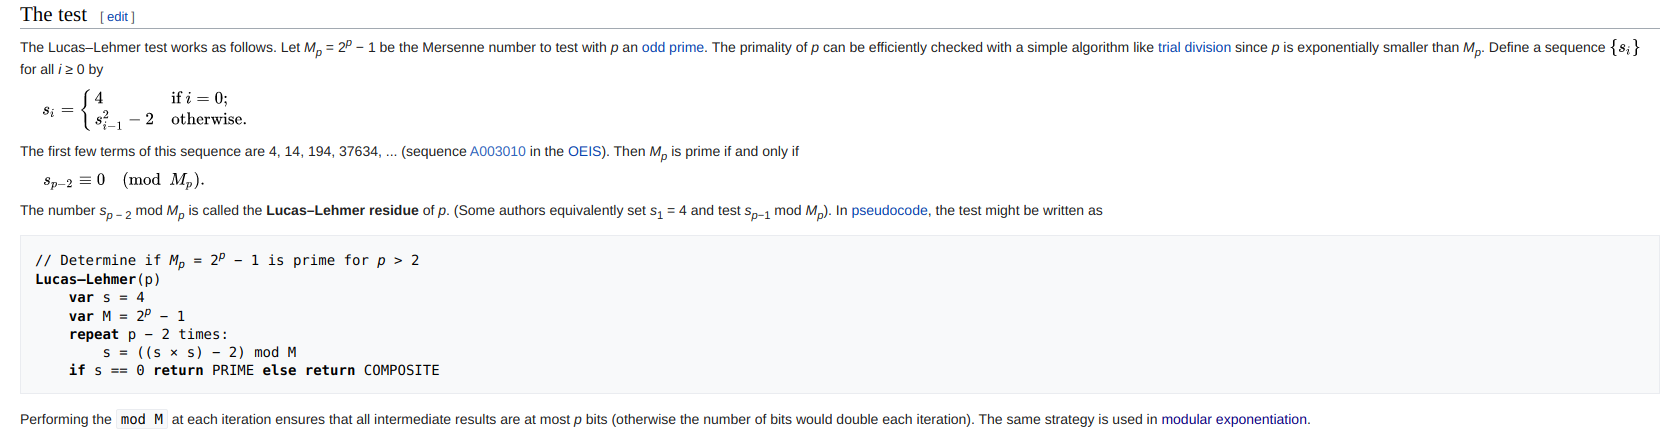

In [11]:
##Lucas–Lehme
# give any number to lucas_lehmer(), returns a list of of lucas_lehmer sequence upto i = p-2

def lucas_lehmer(p):
    list1 = [4]
    M = (2**p) - 1
    for i in range(1, p-1):
        list1.append(  ((list1[i-1]**2)-2) % M  )  #s=( (sxs) -2)mod M
    return list1 

In [12]:
lucas_lehmer(12)

[4, 14, 194, 779, 779, 779, 779, 779, 779, 779, 779]

In [13]:
def ll_prime(p):
    list1 =  lucas_lehmer(p)   # if n^p-1 is prime return 0 else 0 
    if (list1[-1] == 0):
        return 1
    elif (list1[-1] != 0):
        return 0

In [14]:
def check_mersenne_primes(a, b):
    list1 = get_primes(a, b)     # Gets a list of Prime numbers b/w given numbers a, b i.e. 100,3000
    
    list2 = []                   # Gets a Mersenne number 2^n-1 for each prime number given in list 1   i.e. b/w 100 and 3000 
    for x in list1:
        list2.append(mersenne_number(x))
        
    list3 = []          # ll_prime calls the lucas_lehmer ftn which tests each prime number exponent given in list1 
    for i in list1:     # i.e. (exponents of mersenne_numbers) whether the corresponding mersenne_number in list is prime or not
           list3.append(ll_prime(i))
    #print(f'Prime exponents are prime or not i.e. 1 or 0 {list3}')
   
    y = list(zip(list2, list3))   # zip mersenne numbers and 1 or 0 to know whether it is prime or not, 1 is prime 0 is not prime
    return y

In [27]:
y = check_mersenne_primes(100,3000)


In [16]:
mers=[]
s=0
for i in range(0,len(y)):
    if y[i][1]==1:
        mers.append(y[i][0])
        s=s+1
        
        
    

In [17]:
print("Mersenne primes from 100<x<3000 are the following ")

Mersenne primes from 100<x<3000 are the following 


In [18]:
mers[0] #2^107 -1

162259276829213363391578010288127

In [19]:
mers[1]  #2^127 -1

170141183460469231731687303715884105727

In [20]:
mers[2] # 2^521 -1 

6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151

In [21]:
mers[3] # 2^607 -1

531137992816767098689588206552468627329593117727031923199444138200403559860852242739162502265229285668889329486246501015346579337652707239409519978766587351943831270835393219031728127

In [22]:
mers[4] # 2^1279 -1

10407932194664399081925240327364085538615262247266704805319112350403608059673360298012239441732324184842421613954281007791383566248323464908139906605677320762924129509389220345773183349661583550472959420547689811211693677147548478866962501384438260291732348885311160828538416585028255604666224831890918801847068222203140521026698435488732958028878050869736186900714720710555703168729087

In [23]:
mers[5] #2^2203 -1

1475979915214180235084898622737381736312066145333169775147771216478570297878078949377407337049389289382748507531496480477281264838760259191814463365330269540496961201113430156902396093989090226259326935025281409614983499388222831448598601834318536230923772641390209490231836446899608210795482963763094236630945410832793769905399982457186322944729636418890623372171723742105636440368218459649632948538696905872650486914434637457507280441823676813517852099348660847172579408422316678097670224011990280170474894487426924742108823536808485072502240519452587542875349976558572670229633962575212637477897785501552646522609988869914013540483809865681250419497686697771007

In [24]:
mers[6] # 2^2281 -1

446087557183758429571151706402101809886208632412859901111991219963404685792820473369112545269003989026153245931124316702395758705693679364790903497461147071065254193353938124978226307947312410798874869040070279328428810311754844108094878252494866760969586998128982645877596028979171536962503068429617331702184750324583009171832104916050157628886606372145501702225925125224076829605427173573964812995250569412480720738476855293681666712844831190877620606786663862190240118570736831901886479225810414714078935386562497968178729127629594924411960961386713946279899275006954917139758796061223803393537381034666494402951052059047968693255388647930440925104186817009640171764133172418132836351

In [25]:
#Only 7 numbers are prime Mersenne for n=2^x-1  with x in (100,3000)

#We realize that the values of x are 107,127,521,607,1279,2203,2281
#confirm  in https://www.rieselprime.de/ziki/List_of_known_Mersenne_primes